<a href="https://colab.research.google.com/github/zia207/python-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-01-05-tree-based-models-decision-tree-c50-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1xLlN9eEG2IYFBlAuwl53aDVxcBkRnkEw)

# 1.5 C5.0 Model

The **C5.0 model** is an advanced decision tree algorithm used for classification tasks in machine learning, developed by Ross Quinlan as an improvement over his earlier **C4.5 model**. It is widely used for predictive modeling, particularly in data mining and pattern recognition, due to its efficiency and ability to handle complex datasets. Below, I’ll explain what the C5.0 model is, how it works, and how it differs from the C4.5 model. Thsi also covers the implementation of the C5.0 model in R, including a simplified version of the algorithm and using the {C50} package for practical applications.


## Overview

C5.0 is a decision tree-based classifier that builds on the principles of its predecessor, C4.5, but introduces optimizations for better performance, scalability, and accuracy. It is designed to handle both categorical and continuous data, generating decision trees or rule sets to classify data into predefined categories. C5.0 is particularly popular in commercial applications due to its speed, memory efficiency, and ability to produce compact, interpretable models.


### Key Features of C5.0

- `Efficiency`: Optimized for large datasets with faster processing and lower memory usage.
- `Boosting`: Improves accuracy by combining multiple trees.
- `Rule Sets`: Offers interpretable rule-based outputs alongside decision trees.
- `Handling Imbalanced Data`: Robust to datasets with uneven class distributions.
- `Feature Importance`: Provides insights into which features are most influential in predictions.

### How Does the C5.0 Model Work?

The C5.0 algorithm constructs a decision tree or a set of rules by recursively splitting the input data based on feature values, aiming to maximize the separation of classes. Here’s a step-by-step overview of how it works:

1. Data Preparation

   - The algorithm accepts a dataset with labeled examples, where each example has features (attributes) and a target class.
   - It handles both categorical and continuous features, discretizing continuous features if needed.

2. Tree Construction

   - `Splitting Criterion`: C5.0 uses an `information gain ratio` to select the best feature to split the data at each node. This metric measures how much a feature reduces uncertainty (entropy) about the class labels, normalized to avoid bias toward features with many values.
   - `Recursive Partitioning`: The dataset is split based on the chosen feature, creating child nodes. This process repeats for each node until a stopping condition is met (e.g., all instances in a node belong to the same class, or the node is too small).
   - `Pruning`: To prevent overfitting, C5.0 applies post-pruning, removing branches that do not significantly improve classification accuracy on a validation set.

3. Rule Set Generation (Optional)

   - C5.0 can convert the decision tree into a set of if-then rules, which are often more interpretable. These rules are simplified by removing redundant conditions and grouping similar rules.

4. Boosting

   - C5.0 supports `adaptive boosting` (similar to AdaBoost), which builds multiple decision trees iteratively. Each subsequent tree focuses on correcting the errors of previous trees by assigning higher weights to misclassified instances. The final prediction is a weighted vote of all trees.

5. Prediction

   - For a new instance, the model traverses the decision tree or applies the rule set to assign a class label. In boosted models, predictions from multiple trees are combined.

6. Handling Missing Values
   - C5.0 can manage missing data by estimating probabilities for missing feature values based on the distribution of known values.

### Differences from C4.5

- `Smaller Trees`: C5.0 produces more compact models due to optimized splitting and pruning.
- `Boosting Support`: C4.5 lacks built-in boosting, while C5.0 uses it to enhance performance.
- `Rule Sets`: C5.0 can generate rule sets, not just trees, unlike C4.5.
- `Proprietary Nature`: C5.0 is commercial software, though open-source implementations exist (e.g., in R).


| Aspect                | C4.5                              | C5.0                              |
|-----------------------|-----------------------------------|-----------------------------------|
| `Output Type`       | Decision tree only               | Decision tree or rule set         |
| `Ensemble Support`  | None (single tree)               | Boosting (multiple trees)         |
| `Efficiency`        | Less efficient, larger trees     | More efficient, compact models    |
| `Feature Selection` | Basic feature selection          | Supports winnowing for irrelevant features |
| `Cost-Sensitivity`  | Not supported                    | Supported for imbalanced data     |
| `Pruning`           | Post-pruning                     | Advanced pruning techniques       |



### Key Improvements in C5.0 Over C4.5

1. `Speed and Efficiency`: C5.0 is significantly faster and uses less memory, making it suitable for large datasets. This is achieved through optimized algorithms and data structures.
2. `Boosting`: The addition of boosting allows C5.0 to achieve higher accuracy by focusing on difficult-to-classify instances.
3. `Smaller Models`: C5.0 produces more compact decision trees and rule sets, improving interpretability and reducing overfitting.
4. `Robustness`: Better handling of noisy data, missing values, and imbalanced classes.
5. `Rule Simplification`: C5.0 generates more concise and interpreable rule sets compared to C4.5’s sometimes complex outputs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## C5.0 Model in Python

While the C5.0 algorithm is natively supported in R via the {C50} package, Python does not have a direct implementation in popular libraries like scikit-learn. However, you can approximate C5.0-like functionality using scikit-learn’s DecisionTreeClassifier (based on the CART algorithm, which is similar but not identical).  

I’ll implement a simplified version of the C5.0 algorithm in Python. Implementing the full C5.0 algorithm (including gain ratio, boosting, and aggressive pruning) from scratch is highly complex and typically requires optimized libraries. Instead, I’ll:

- Build a basic decision tree using the gain ratio as the splitting criterion, mimicking C5.0’s core splitting logic.

-  Exclude boosting and advanced pruning (as in full C5.0) due to complexity but include a simple pruning step based on error rates.

-  Evaluate the model on a test set with accuracy and a confusion matrix.

### Create a Dataset

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create the Play Tennis dataset
data = pd.DataFrame({
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
})

# Convert categorical variables to factors (using pandas categories)
for col in ["Outlook", "Temperature", "Humidity", "Wind", "Play"]:
    data[col] = data[col].astype("category")

# Split data into training (80%) and testing (20%)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=123)

print("Training data:")
display(train_data)
print("\nTesting data:")
display(test_data)


Training data:


,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
5,Rain,Cool,Normal,Strong,No
9,Rain,Mild,Normal,Weak,Yes
8,Sunny,Cool,Normal,Weak,Yes
11,Overcast,Mild,High,Strong,Yes
3,Rain,Mild,High,Weak,Yes
1,Sunny,Hot,High,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes
2,Overcast,Hot,High,Weak,Yes



Testing data:


,Outlook,Temperature,Humidity,Wind,Play
7,Sunny,Mild,High,Weak,No
10,Sunny,Mild,Normal,Strong,Yes
4,Rain,Cool,Normal,Weak,Yes


###  Functions for C5.0-like Decision Tree

- **Entropy (`entropy`)**: Measures label impurity using - $\sum p_i \log_2(p_i)$, where $p_i$ is class proportion. Adds `1e-10` to avoid $\log_2(0)$. E.g., 5 Yes/5 No → entropy ~1.

- **Information Gain (`info_gain`)**: Computes gain ratio for a feature. Calculates total entropy, subtracts weighted entropy of subsets (by feature values), and divides by split info (-$\sum \frac{|D_v|}{|D|} \log_2(\frac{|D_v|}{|D|})$). Returns 0 if split info is 0. E.g., `Outlook` split reduces entropy.

- **Best Split (`best_split`)**: Picks feature with highest gain ratio. E.g., chooses `Outlook` if its gain ratio is 0.156.

- **Build Tree (`build_tree`)**: Recursively splits data on best feature. Stops if pure, max depth (3), or <2 instances. Creates leaf (majority class) or split node with child subtrees. E.g., splits on `Outlook`, then `Humidity`.


In [4]:
import numpy as np
import pandas as pd

# Entropy calculation
def entropy(labels):
    probs = labels.value_counts() / len(labels)
    return -np.sum(probs * np.log2(probs + 1e-10)) # Add small constant to avoid log(0)

# Information gain calculation (using gain ratio)
def info_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values = data[feature].unique()
    weighted_entropy = 0
    split_info = 0
    for val in values:
        subset = data[data[feature] == val]
        weight = len(subset) / len(data)
        weighted_entropy += weight * entropy(subset[target])
        split_info -= weight * np.log2(weight + 1e-10)

    gain = total_entropy - weighted_entropy
    if split_info == 0:
        return 0  # Avoid division by zero

    gain_ratio = gain / split_info
    return gain_ratio

# Find best feature to split
def best_split(data, features, target):
    gains = {}
    for f in features:
        gains[f] = info_gain(data, f, target)
    best_feature = max(gains, key=gains.get)
    return {"feature": best_feature, "gain_ratio": gains[best_feature]}

# Build decision tree recursively
def build_tree(data, features, target, max_depth=3, depth=0):
    # Stopping criteria
    if len(data[target].unique()) == 1 or depth >= max_depth or len(data) < 2:
        return {
            "type": "leaf",
            "class": data[target].value_counts().idxmax(),
            "size": len(data)
        }

    # Find best feature
    split = best_split(data, features, target)
    if split["gain_ratio"] == 0:
         return {
            "type": "leaf",
            "class": data[target].value_counts().idxmax(),
            "size": len(data)
        }

    # Split data
    node = {"type": "split", "feature": split["feature"], "children": {}}
    values = data[split["feature"]].unique()
    remaining_features = [f for f in features if f != split["feature"]]

    # Create child nodes
    for val in values:
        subset = data[data[split["feature"]] == val]
        if len(subset) > 0:
            node["children"][val] = build_tree(subset, remaining_features, target, max_depth, depth + 1)

    return node

### Predicting and Pruning the Tree

- **Predict Instance (`predict_instance`)**: Predicts class for one instance. If at a leaf, returns its class. Else, follows the tree by matching the instance’s feature value to a child node. If no matching child, defaults to majority class from training data (e.g., "Yes" for `Play`).

- **Predict Tree (`predict_tree`)**: Applies `predict_instance` to each row of a dataset, returning predictions for all instances.

- **Prune Tree (`prune_tree`)**: Simplifies tree to reduce overfitting. For a node:
  - Computes error rate of current subtree predictions.
  - Compares with error if replaced by a leaf with majority class.
  - Prunes to leaf if leaf error is lower/equal.
  - Recursively prunes child nodes if not pruned.
  - Returns updated tree.

In [5]:
# Predict for a single instance
def predict_instance(tree, instance, majority_class):
    if tree["type"] == "leaf":
        return tree["class"]
    feature_val = instance[tree["feature"]]
    if feature_val in tree["children"]:
        return predict_instance(tree["children"][feature_val], instance, majority_class)
    else:
        return majority_class # Default to majority class

# Predict for a dataset
def predict_tree(tree, data, majority_class):
    return data.apply(lambda row: predict_instance(tree, row, majority_class), axis=1)

# Simple pruning based on error rate
def prune_tree(tree, data, target):
    if tree["type"] == "leaf":
        return tree

    # Get majority class of the current data subset
    majority_class_subset = data[target].value_counts().idxmax()

    # Predict with current tree
    preds = predict_tree(tree, data, majority_class_subset)
    error = (preds != data[target]).sum() / len(data)

    # Predict with leaf (majority class)
    leaf_error = (data[target] != majority_class_subset).sum() / len(data)

    # Prune if leaf has lower or equal error
    if leaf_error <= error:
        return {
            "type": "leaf",
            "class": majority_class_subset,
            "size": len(data)
        }

    # Recursively prune children
    for val in list(tree["children"].keys()): # Use list to allow modification during iteration
        subset = data[data[tree["feature"]] == val]
        if len(subset) > 0:
            tree["children"][val] = prune_tree(tree["children"][val], subset, target)
        else:
            # If a subset is empty after splitting, remove the child node
            del tree["children"][val]


    return tree

### Fit the Model and Evaluate

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Fit the model
features = ["Outlook", "Temperature", "Humidity", "Wind"]
target = "Play"
tree = build_tree(train_data, features, target, max_depth=3)
pruned_tree = prune_tree(tree, train_data, target)

# Function to print tree structure
def print_tree(tree, indent=""):
    if tree["type"] == "leaf":
        print(f"{indent}Class: {tree['class']} (Size: {tree['size']})")
    else:
        print(f"{indent}Split on {tree['feature']}")
        for val in tree["children"]:
            print(f"{indent}  {tree['feature']} = {val}:")
            print_tree(tree["children"][val], indent + "    ")

print("Decision Tree:")
print_tree(pruned_tree)

# Evaluate on test data
# We need the majority class from the training data for prediction
majority_class_train = train_data[target].value_counts().idxmax()
predictions = predict_tree(pruned_tree, test_data, majority_class_train)

# Calculate confusion matrix and accuracy
conf_matrix = confusion_matrix(test_data[target], predictions)
accuracy = accuracy_score(test_data[target], predictions)

print("\nAccuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Decision Tree:
Split on Outlook
  Outlook = Sunny:
    Split on Temperature
      Temperature = Hot:
        Class: No (Size: 2)
      Temperature = Cool:
        Class: Yes (Size: 1)
  Outlook = Rain:
    Split on Wind
      Wind = Strong:
        Class: No (Size: 2)
      Wind = Weak:
        Class: Yes (Size: 2)
  Outlook = Overcast:
    Class: Yes (Size: 4)

Accuracy: 0.6666666666666666
Confusion Matrix:
[[0 1]
 [0 2]]



This shows rules derived from the data, with confidence scores.

### Visualize the Tree



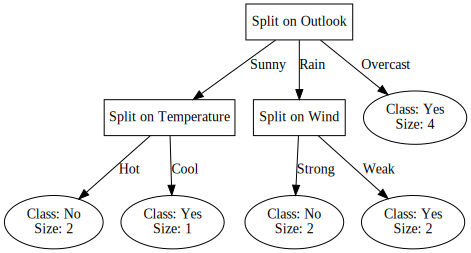

In [9]:
import graphviz

def add_nodes_edges(tree, dot=None):
    if dot is None:
        dot = graphviz.Digraph(comment='Decision Tree')

    if tree['type'] == 'leaf':
        dot.node(str(id(tree)), f"Class: {tree['class']}\nSize: {tree['size']}", shape='ellipse')
    else:
        node_id = str(id(tree))
        dot.node(node_id, f"Split on {tree['feature']}", shape='box')
        for value, child in tree['children'].items():
            child_id = str(id(child))
            add_nodes_edges(child, dot)
            dot.edge(node_id, child_id, label=str(value))
    return dot

# Assuming 'pruned_tree' is the name of your built tree dictionary
dot = add_nodes_edges(pruned_tree)
display(dot)

## Summary and Conclusion

This notebook explores the C5.0 decision tree model, highlighting its features and differences from the C4.5 model. It then implements a simplified version of the C5.0 algorithm in Python, including functions for entropy, information gain, finding the best split, building the tree, prediction, and pruning. Finally, it demonstrates how to fit the model to a sample dataset, evaluate its performance using accuracy and a confusion matrix, and visualize the resulting decision tree.

In conclusion, this notebook provides a practical introduction to the C5.0 algorithm by building a foundational implementation in Python and illustrating its application on a small dataset. While this simplified version does not encompass all the advanced features of the full C5.0 model (like boosting or more sophisticated pruning), it effectively demonstrates the core principles of decision tree construction and evaluation. The visualization helps in understanding the decision-making process of the trained model.

## References

1. Quinlan, J. R. (1993). *C4.5: Programs for Machine Learning*. Morgan Kaufmann.
   - Context for C5.0’s evolution from C4.5.
2. Kuhn, M., & Quinlan, R. (2023). *C50: C5.0 Decision Trees and Rule-Based Models*. CRAN.
   - Official `C50` package documentation: [CRAN C50](https://cran.r-project.org/web/packages/C50/C50.pdf).
3. Witten, I. H., Frank, E., & Hall, M. A. (2016). *Data Mining: Practical Machine Learning Tools and Techniques*. Morgan Kaufmann.
   - Covers decision trees and C5.0’s feature